# Analysing the Decline in sales of a variant of Electric Scooters:
Microexperience by Bluetick.ai (MX-08-11)
**Website**:https://www.bluetick.ai/
**Context:** Zoom Electric introduced a new scooter model called Sprint in the electric two-wheeler segment. Initially, the sales numbers for Sprint Scooters were quite impressive during the first two weeks of its launch. However, unexpectedly, there was a sudden decline in sales thereafter. The Sprint Scooter was launched at a time of the year, different to its other variants. We have to investigate the causes behind this decline of sales based on two considerations:
> 1) Launch Date, and 2) Influence of Email Campaigns targeted specifically for Sprint Scooters.
* The sales are analysed based on comparison of the Sprint Scooter with any other variant (here, Sprint Limited Edition) and finding their volume of sales and growth comparison (cumulatively for the first 21 days from the date of product launch over a 7-Days rolling period).
* The emails are analysed based on their Clickrate and Opening Rate specifically for Sprint Scooters and comparing them to industry benchmarks.

**Data Visualization Chart(s) of Growth Summary in initial 3 weeks of launch**: https://public.tableau.com/views/ZoomElectricGrowthComp_Summary/Sheet1?:language=en-US&:display_count=n&:origin=viz_share_link

# Importing the Libraries and the Datasets.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
dfp = pd.read_csv ('/kaggle/input/products/products.csv') #dataframe for products
dfs=pd.read_csv('/kaggle/input/products/sales.csv') #dataframe for sales
print ("\nDataframe for Products:\n",dfp)
print("\nDataframe for Sales:\n",dfs)
es=pd.read_csv('/kaggle/input/products/email_subject.csv') #es is Email Subjects Dataframe
print("\nDataframe for Email Subjects:\n",es)
e=pd.read_csv('/kaggle/input/products/emails.csv') #e is the email dataframe
print ("\nDataframe for Emails Sent:\n",e)



Dataframe for Products:
     product_id                   model  year product_type  base_price  \
0            1                  FioNex  2010      scooter       63998   
1            2  FioNex Limited Edition  2011      scooter      127998   
2            3                  FioNex  2013      scooter       79998   
3            4               DeltaPlus  2014   automobile      920000   
4            5                  Parker  2014      scooter      111998   
5            6                  Corpel  2015   automobile      524000   
6            7                  Sprint  2016      scooter       95998   
7            8  Sprint Limited Edition  2017      scooter      111998   
8            9            SigniaSafari  2017   automobile      280000   
9           10               Zelito800  2017   automobile      686000   
10          11               DeltaPlus  2019   automobile      760000   
11          12           FioNex Zester  2019      scooter       55998   

   production_start_date

In [2]:
#Creating a new dataframe of products to store the data of only Sprint and Sprint LE
rows=dfp.loc[[6,7]]
print(rows)

   product_id                   model  year product_type  base_price  \
6           7                  Sprint  2016      scooter       95998   
7           8  Sprint Limited Edition  2017      scooter      111998   

  production_start_date production_end_date  
6      10-10-2016 00:00                 NaN  
7      15-02-2017 00:00                 NaN  


In [3]:
dfs.head()

,customer_id,product_id,sales_transaction_date,channel,dealership_id
0,1,7,2017-07-19 08:38:00,internet,NaN
1,22,7,2017-08-14 09:59:00,dealership,20.0
2,145,7,2019-01-20 10:40:00,internet,NaN
3,289,7,2017-05-09 14:20:00,dealership,7.0
4,331,7,2019-05-21 20:03:00,dealership,4.0


In [4]:
#Sorting the dataframe of Sales according to date of transaction
dfs.sort_values('sales_transaction_date',inplace=True)
dfs.head()

,customer_id,product_id,sales_transaction_date,channel,dealership_id
34106,18751,1,2010-03-10 07:28:00,internet,NaN
35230,7236,1,2010-03-12 22:52:00,internet,NaN
35048,42449,1,2010-03-15 00:09:00,internet,NaN
34548,520,1,2010-03-17 09:34:00,internet,NaN
33890,34611,1,2010-03-18 23:21:00,internet,NaN


In [5]:
#Creating a new dataframe n that contains only the sales data of Sprint by Filtering the DataFrame dfs based on the specified column values
n = dfs[(dfs['product_id'] == 7)]
sp=n.sort_values('sales_transaction_date')
sp.head()

,customer_id,product_id,sales_transaction_date,channel,dealership_id
5491,4319,7,2016-10-10 00:41:00,internet,NaN
3910,40250,7,2016-10-10 02:47:00,dealership,4.0
7249,35497,7,2016-10-10 04:21:00,dealership,2.0
6635,4553,7,2016-10-10 07:42:00,dealership,11.0
2123,11678,7,2016-10-10 09:21:00,internet,NaN


In [6]:
#Therefore, sp stores the sales data of the Product ID(=7) i.e. Sprint Bikes
#Grouping the dataframe sp by their sales date(ignoring the time/hour) and counting such rows using size() to find number of sales on each day
sp['sales_transaction_date']=pd.to_datetime(sp['sales_transaction_date']) #Date not provided in Pandas Date-Time form, so converted using pandas
ndfsp= sp.groupby(sp['sales_transaction_date'].dt.date).size().reset_index(name="Sales")
print(ndfsp)

    sales_transaction_date  Sales
0               2016-10-10      9
1               2016-10-11      6
2               2016-10-12     10
3               2016-10-13     10
4               2016-10-14      5
..                     ...    ...
959             2019-05-27     11
960             2019-05-28      8
961             2019-05-29      8
962             2019-05-30      7
963             2019-05-31      5

[964 rows x 2 columns]


# Sales Volume for first 21 days of Sprint Bikes


In [7]:
#Plotting a Growth Chart for the first 3 weeks Sales/21 Days
s21d=ndfsp[:22] #Dataframe to store sales data for first 21 days
salesofsprint=go.Figure([go.Line(x=s21d['sales_transaction_date'],y=s21d['Sales'])])
salesofsprint.update_layout(title='Sales Volume of Sprint Bikes',xaxis_title='Date',yaxis_title='Number of Bikes Sold')
salesofsprint.show()
print("Sales Volume for 21 days of Sprint Bikes:\n",s21d)



/opt/conda/lib/python3.10/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning: plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.

  warnings.warn(


Sales Volume for 21 days of Sprint Bikes:
    sales_transaction_date  Sales
0              2016-10-10      9
1              2016-10-11      6
2              2016-10-12     10
3              2016-10-13     10
4              2016-10-14      5
5              2016-10-15     10
6              2016-10-16     14
7              2016-10-17      9
8              2016-10-18     11
9              2016-10-19     12
10             2016-10-20     10
11             2016-10-21      6
12             2016-10-22      2
13             2016-10-23      5
14             2016-10-24      6
15             2016-10-25      9
16             2016-10-26      2
17             2016-10-27      4
18             2016-10-28      7
19             2016-10-29      5
20             2016-10-30      5
21             2016-10-31      3


# Sales Volume for first 21 Days of Sprint Limited Edition Bikes

In [8]:
#Creating a new dataframe that stores only the Sales Data of the Sprint LE
n1 = dfs[(dfs['product_id'] == 8)]
sle=n1.sort_values('sales_transaction_date')
#sle.head(100)

In [9]:
#Therefore, sle stores the sales data of the Product ID(=8) i.e. Sprint Limited Edition Bikes
#Grouping the dataframe sle by their sales date(ignoring the time/hour) and counting such rows to find number of sales on each day
sle['sales_transaction_date']=pd.to_datetime(sle['sales_transaction_date']) #Date not provided in Pandas Date-Time form, so converted using pandas
ndfsle= sle.groupby(sle['sales_transaction_date'].dt.date).size().reset_index(name="Sales")
#ndfsle.head(21)

In [10]:
#Plotting a growth chart for Sprint LE(for all the dates)
sle21d=ndfsle[:22] #Dataframe to store sales data for first 21 days
salesofsprintle=go.Figure([go.Line(x=sle21d['sales_transaction_date'],y=sle21d['Sales'])])
salesofsprintle.update_layout(title='Sales Volume of Sprint Limited Edition Bikes',xaxis_title='Date',yaxis_title='Number of Bikes Sold')
salesofsprintle.show()
print("Sales Volume of first 21 days for Sprint LE Bikes:\n",sle21d)

/opt/conda/lib/python3.10/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




Sales Volume of first 21 days for Sprint LE Bikes:
    sales_transaction_date  Sales
0              2017-02-15      6
1              2017-02-16      2
2              2017-02-17      1
3              2017-02-18      4
4              2017-02-19      5
5              2017-02-20      6
6              2017-02-21      5
7              2017-02-22      4
8              2017-02-23      6
9              2017-02-24      2
10             2017-02-25      2
11             2017-02-26      2
12             2017-02-27      4
13             2017-02-28      4
14             2017-03-01      5
15             2017-03-02      1
16             2017-03-03      3
17             2017-03-04      8
18             2017-03-05      4
19             2017-03-06      7
20             2017-03-07      7
21             2017-03-08      8


# Analysing The Growth Rate over a 7-Day Rolling Period

In [11]:
#Joining the Sales numbers from Sprint Limited Edition to the Dataframe of Sprint
df = s21d.merge(sle21d[['Sales']], left_index=True,right_index=True,how='left')

df=df.drop('sales_transaction_date',axis=1)
df=df.loc[:, ~df.columns.duplicated()]
#Adding the Day number to this dataframe
df['Day No.']=df.index +1
print(df) #here, Sales_x means Sprint and Sales_y column means Sprint LE Bikes


    Sales_x  Sales_y  Day No.
0         9        6        1
1         6        2        2
2        10        1        3
3        10        4        4
4         5        5        5
5        10        6        6
6        14        5        7
7         9        4        8
8        11        6        9
9        12        2       10
10       10        2       11
11        6        2       12
12        2        4       13
13        5        4       14
14        6        5       15
15        9        1       16
16        2        3       17
17        4        8       18
18        7        4       19
19        5        7       20
20        5        7       21
21        3        8       22


# **MX Deliverables D1:** Quantifying the sales drop 

> **1)FOR SPRINT BIKES**

In [12]:
dfc=df #dfc is a duplicate dataframe of df for growth summary of Sprint Bikes
dfc=dfc.drop('Sales_y',axis=1)
dfc.rename(columns={'Sales_x': 'Sprint Sale/Day'}, inplace=True)
dfc['current_period_sales'] = dfc['Sprint Sale/Day'].rolling(window=7, min_periods=7).sum() #min_periods set to rolling value itself to obtain values only according to 7-day rolling time.
dfc['previous_period_sales'] = dfc['Sprint Sale/Day'].shift(1).rolling(window=7, min_periods=7).sum()  #min_periods set to rolling value itself to obtain values only according to 7-day rolling time.
dfc['Percentage Growth of Sprint']= (((dfc['current_period_sales']-dfc['previous_period_sales'])/dfc['previous_period_sales'])*100)
dfc.set_index('Day No.',inplace=True)
print(dfc)

         Sprint Sale/Day  current_period_sales  previous_period_sales  \
Day No.                                                                 
1                      9                   NaN                    NaN   
2                      6                   NaN                    NaN   
3                     10                   NaN                    NaN   
4                     10                   NaN                    NaN   
5                      5                   NaN                    NaN   
6                     10                   NaN                    NaN   
7                     14                  64.0                    NaN   
8                      9                  64.0                   64.0   
9                     11                  69.0                   64.0   
10                    12                  71.0                   69.0   
11                    10                  71.0                   71.0   
12                     6                  72.0     

> **2) FOR SPRINT LIMITED EDITION BIKES**

In [13]:
dfp=df #dfp is another duplicate dataframe to obtain the data from dataframe df
dfp=dfp.drop('Sales_x',axis=1)
dfp.rename(columns={'Sales_y':'Sprint LE Sale/Day'},inplace=True)
dfp['current_period_sales'] = dfp['Sprint LE Sale/Day'].rolling(window=7, min_periods=7).sum()  #min_periods set to rolling value itself to obtain values only according to 7-day rolling time.
dfp['previous_period_sales'] = dfp['Sprint LE Sale/Day'].shift(1).rolling(window=7, min_periods=7).sum()  #min_periods set to rolling value itself to obtain values only according to 7-day rolling time.
dfp['Percentage Growth of Sprint LE']= (((dfp['current_period_sales']-dfp['previous_period_sales'])/dfp['previous_period_sales'])*100)
dfp.set_index('Day No.',inplace=True)
print(dfp)

         Sprint LE Sale/Day  current_period_sales  previous_period_sales  \
Day No.                                                                    
1                         6                   NaN                    NaN   
2                         2                   NaN                    NaN   
3                         1                   NaN                    NaN   
4                         4                   NaN                    NaN   
5                         5                   NaN                    NaN   
6                         6                   NaN                    NaN   
7                         5                  29.0                    NaN   
8                         4                  27.0                   29.0   
9                         6                  31.0                   27.0   
10                        2                  32.0                   31.0   
11                        2                  30.0                   32.0   
12          

# **MX Deliverables D2**

**TABLE 2**: Growth comparison summary for scooter variants in its initial 3 week of launch (as given in Table 2 of the MX)



In [14]:
growth_comparison= dfc.merge(dfp[['Percentage Growth of Sprint LE']], left_index=True,right_index=True,how='left')
growth_comparison=growth_comparison.drop('Sprint Sale/Day',axis=1)
growth_comparison=growth_comparison.drop('current_period_sales',axis=1)
growth_comparison=growth_comparison.drop('previous_period_sales',axis=1)
print("Growth Comparison Summary for Sprint & Sprint LE:\n",growth_comparison)
growth_comparison.to_excel('Growth Comparison Summary.xlsx',index=True)

Growth Comparison Summary for Sprint & Sprint LE:
          Percentage Growth of Sprint  Percentage Growth of Sprint LE
Day No.                                                             
1                                NaN                             NaN
2                                NaN                             NaN
3                                NaN                             NaN
4                                NaN                             NaN
5                                NaN                             NaN
6                                NaN                             NaN
7                                NaN                             NaN
8                           0.000000                       -6.896552
9                           7.812500                       14.814815
10                          2.898551                        3.225806
11                          0.000000                       -6.250000
12                          1.408451                

> Creating a bar chart and a plot to depict the 7 days cumulative sales growth for Sprint and Sprint LE Bikes as obtained from the table above.

The same charts have been made on Tableau for data visualization as well. Link:https://public.tableau.com/views/ZoomElectricGrowthComp_Summary/Sheet1?:language=en-US&:display_count=n&:origin=viz_share_link

<function matplotlib.pyplot.show(close=None, block=None)>

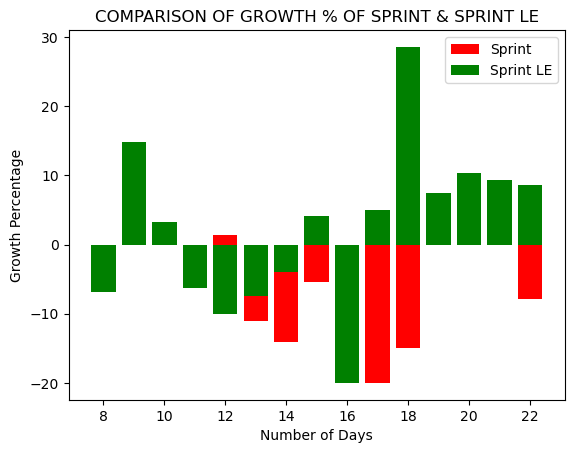

In [15]:
plt.bar(growth_comparison.index,growth_comparison['Percentage Growth of Sprint'],label='Sprint',color='red')
plt.bar(growth_comparison.index,growth_comparison['Percentage Growth of Sprint LE'],label='Sprint LE',color='green')
plt.xlabel('Number of Days')
plt.ylabel('Growth Percentage')
plt.legend()
plt.title('COMPARISON OF GROWTH % OF SPRINT & SPRINT LE')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

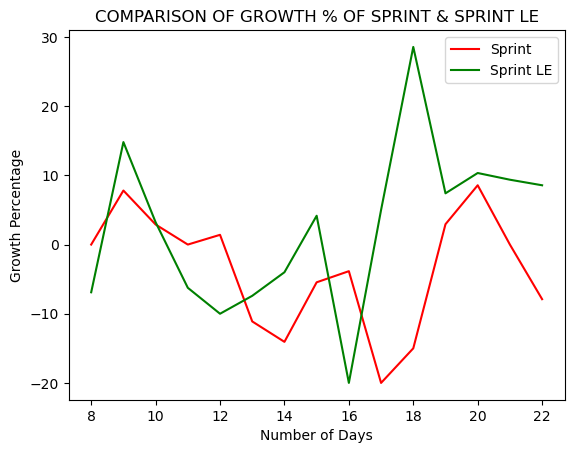

In [16]:
plt.plot(growth_comparison.index,growth_comparison['Percentage Growth of Sprint'],label='Sprint',color='red')
plt.plot(growth_comparison.index,growth_comparison['Percentage Growth of Sprint LE'],label='Sprint LE',color='green')
plt.xlabel('Number of Days')
plt.ylabel('Growth Percentage')
plt.legend()
plt.title('COMPARISON OF GROWTH % OF SPRINT & SPRINT LE')
plt.show

# **Inference from Date of Launch**
The graph obtained above shows that the launch date effectively HAD an impact on sales of Sprint Scooters. Sprint LE Scooters which were launched on a different launch date performed better than the normal Sprint Scooters.

# **Analysing the Emails**
*As a second step, we are investigating if the email campaign for Sprint Scooters have had impact results to draw customer attention by figuring out the Click-Through Rate and the Email Opening Rate and comparing them with benchmark values.*

In [17]:
#Email Data for Sprint Scooters
s=e #dataframe s stores emails sent after the launch date i.e. 2016-09-01
s['sent_date']=pd.to_datetime(s['sent_date']).dt.date #converting the sent date to only date ignoring timr

print(s)

        email_id  customer_id opened clicked bounced   sent_date  \
0              1           18      f       f       f  2011-01-03   
1              2           30      f       f       f  2011-01-03   
2              3           41      t       f       f  2011-01-03   
3              4           52      f       f       f  2011-01-03   
4              5           59      f       f       f  2011-01-03   
...          ...          ...    ...     ...     ...         ...   
418153    418154        49996      f       f       f  2019-01-07   
418154    418155        49997      t       f       f  2019-01-07   
418155    418156        49998      f       f       f  2019-01-07   
418156    418157        49999      t       f       f  2019-01-07   
418157    418158        50000      t       f       f  2019-01-07   

             opened_date clicked_date  email_subject_id  
0                    NaN          NaN                 6  
1                    NaN          NaN                 6  
2       0

In [18]:
specificdate=(pd.to_datetime('2016-09-01').date()) #specificdate is a variable storing the lower-limit value i.e. 2016-09-01
s= s[(s['sent_date'] >specificdate) ].copy()

print("Emails sent after 2016-09-01:\n",s)


Emails sent after 2016-09-01:
         email_id  customer_id opened clicked bounced   sent_date  \
174736    174737            2      f       f       f  2016-09-21   
174737    174738            5      t       f       f  2016-09-21   
174738    174739            6      f       f       f  2016-09-21   
174739    174740            7      f       f       f  2016-09-21   
174740    174741            8      f       f       f  2016-09-21   
...          ...          ...    ...     ...     ...         ...   
418153    418154        49996      f       f       f  2019-01-07   
418154    418155        49997      t       f       f  2019-01-07   
418155    418156        49998      f       f       f  2019-01-07   
418156    418157        49999      t       f       f  2019-01-07   
418157    418158        50000      t       f       f  2019-01-07   

             opened_date clicked_date  email_subject_id  
174736               NaN          NaN                 7  
174737  22-09-2016 10:12          Na

In [19]:
specificdate1=(pd.to_datetime('2016-10-31').date()) #specificdate1 is storing the upper-limit value i.e. 2016-10-31
s= s[(s['sent_date'] <specificdate1) ].copy() 
print("Emails sent after 2016-09-01 and before 2016-10-31:\n",s)

Emails sent after 2016-09-01 and before 2016-10-31:
         email_id  customer_id opened clicked bounced   sent_date  \
174736    174737            2      f       f       f  2016-09-21   
174737    174738            5      t       f       f  2016-09-21   
174738    174739            6      f       f       f  2016-09-21   
174739    174740            7      f       f       f  2016-09-21   
174740    174741            8      f       f       f  2016-09-21   
...          ...          ...    ...     ...     ...         ...   
209798    209799        49995      t       f       f  2016-09-21   
209799    209800        49996      f       f       f  2016-09-21   
209800    209801        49997      f       f       f  2016-09-21   
209801    209802        49998      f       f       f  2016-09-21   
209802    209803        50000      f       f       f  2016-09-21   

             opened_date clicked_date  email_subject_id  
174736               NaN          NaN                 7  
174737  22-09-

In [20]:
sprint=s[s['email_subject_id'].isin([7])] #filtering the dataframe to contain only emails sent wrt Sprint Scooters from 2016-09-01 upto 2016-10-31
print("Mails with regards to Sprint Campign:\n",sprint)

Mails with regards to Sprint Campign:
         email_id  customer_id opened clicked bounced   sent_date  \
174736    174737            2      f       f       f  2016-09-21   
174737    174738            5      t       f       f  2016-09-21   
174738    174739            6      f       f       f  2016-09-21   
174739    174740            7      f       f       f  2016-09-21   
174740    174741            8      f       f       f  2016-09-21   
...          ...          ...    ...     ...     ...         ...   
209798    209799        49995      t       f       f  2016-09-21   
209799    209800        49996      f       f       f  2016-09-21   
209800    209801        49997      f       f       f  2016-09-21   
209801    209802        49998      f       f       f  2016-09-21   
209802    209803        50000      f       f       f  2016-09-21   

             opened_date clicked_date  email_subject_id  
174736               NaN          NaN                 7  
174737  22-09-2016 10:12    

*Finding out the Clickrate for emails sent wrt Sprint Bikes*

In [21]:
emails_clickedornot= sprint['clicked'].value_counts()
emails_bouncedornot= sprint['bounced'].value_counts()
print (emails_clickedornot)
print(emails_bouncedornot)

f    34219
t      848
Name: clicked, dtype: int64
f    34942
t      125
Name: bounced, dtype: int64


In [22]:
clickrate=848/((34219+848)-125)
print (clickrate*100)

2.426878827771736


Therefore, **CTR (Click Rate) is 2.4268%**

*Finding out the Email Opening Rate*

In [23]:
emails_openedornot=sprint['opened'].value_counts()
print(emails_openedornot)

f    28072
t     6995
Name: opened, dtype: int64


In [24]:
openrate=6995/((28072+6995)-125) #emails opened/(Total emails-Bounced Mails)
print(openrate*100)

20.018888443706714


The **email opening rate thus comes out to be 20.01%**

# Comparison of CTR and Opening Rate with Industry Benchmarks

In [25]:
comparison=pd.DataFrame(columns=['Sprint %age','Industry Benchmark %age'])
comparison['Sprint %age']=[openrate*100,clickrate*100]
comparison['Industry Benchmark %age']=['18%','8%']
index=['Opening Rate','Click Rate']
comparison.index=index
print(comparison)
#Printing if campaign is a success or not
if((openrate*100)>18) and ((clickrate*100)>8):
  print('\nCampaign Result:Success')
else:
  print('\nCampaign Result:Failure')

              Sprint %age Industry Benchmark %age
Opening Rate    20.018888                     18%
Click Rate       2.426879                      8%

Campaign Result:Failure


# Inference from Email Analysis:
The campaign for Sprint Bikes has been ineffective owing to it not meeting the industry standards. This therefore also contributes to the decline in sales.